# 数据可视化
## 原始数据：

In [1]:
import preprocessing as pre

In [2]:
print("源代码词汇表大小：",pre.SRC_VOCAB_SIZE)
print("注释词汇表大小：",pre.TGT_VOCAB_SIZE)

源代码词汇表大小： 12443
注释词汇表大小： 10174


In [3]:
demo = pre.vocab_transform[pre.NL_LANGUAGE].get_itos()
print(demo[0:100])

['<unk>', '<pad>', '<bos>', '<eos>', '<str>', '<int>', '.', 'the', 'a', 'to', 'of', 'for', ':', 'and', 'return', 'in', 'from', '-', 'an', 'is', 'returns', 'if', 'given', 'with', 'list', 'this', '(', 'that', ')', 'on', '/', 'or', 'all', 'file', 'get', 'by', 'data', 'value', 'function', 'as', 'name', 'set', 'string', 'object', 'create', 'be', 'path', 'it', '', 's', 'into', 'new', 'model', 'specified', '0', 'values', 'type', 'not', 'are', 'current', 'check', 'class', 'convert', 'method', 'add', 'key', '::', '..', 'api', 'input', 'user', 'each', 'used', 'dict', 'one', 'array', 'at', 'id', 'versionadded', 'image', 'update', 'using', 'instance', 'true', 'index', '[', 'directory', 'dictionary', 'node', 'helper', 'text', 'use', ']', 'parameters', 'which', 'run', 'will', 'can', 'default', 'command']


#### 代码token分布直方图

<Axes: ylabel='Frequency'>

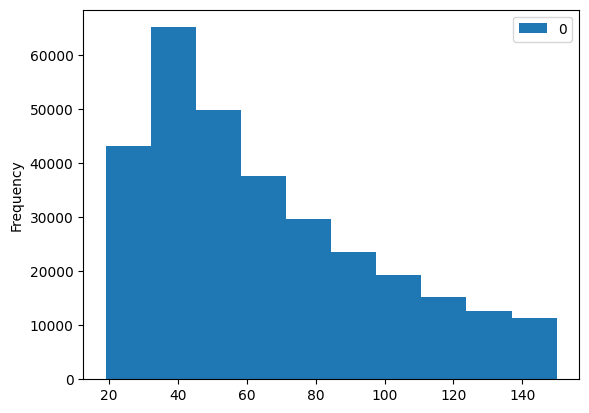

In [1]:
from myIterDataPipe import MapperIterDataPipe
from torch.utils.data import DataLoader
import pandas as pd
BATCH_SIZE = 10
train_iter = MapperIterDataPipe(split='train', language_pair=(0, 1))
src_token_num = []
nl_token_num = []
for src, tgt in train_iter:
    src_token_num.append(len(src))
    nl_token_num.append(len(tgt))
df = pd.DataFrame(src_token_num)
df.plot.hist()

In [2]:
frequency_lt_100 = (df < 100).sum()
frequency_lt_150 = (df < 150).sum()
frequency_lt_200 = (df < 200).sum()
frequency_table =pd.DataFrame({
    'Range': ['<100', '<150', '<200'],
    'Frequency': [frequency_lt_100, frequency_lt_150, frequency_lt_200]
})
print(frequency_table)

  Range                 Frequency
0  <100  0    266030
dtype: int64
1  <150  0    325182
dtype: int64
2  <200  0    356528
dtype: int64


<Axes: ylabel='Frequency'>

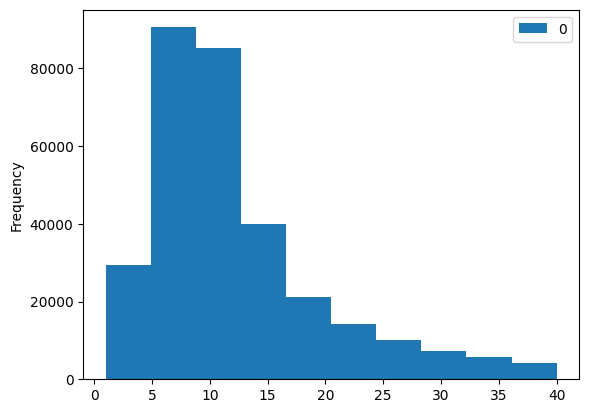

In [2]:
df = pd.DataFrame(nl_token_num)
df.plot.hist()

In [7]:
train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=pre.collate_fn)
for src, tgt in train_dataloader:
    print(src)
    break

tensor([[  2,   2,   2,  ...,   2,   2,   2],
        [ 39,  39,  39,  ...,  39,  39,  39],
        [251, 884,   0,  ...,   0,   0,   0],
        ...,
        [ 32,   1,   1,  ...,   1,   1,   1],
        [  0,   1,   1,  ...,   1,   1,   1],
        [  3,   1,   1,  ...,   1,   1,   1]])


In [8]:
for src, tgt in train_iter:
    print(src)
    break

['def', 'train', '(', 'train_dir', ',', 'model_save_path', '=', 'None', ',', 'n_neighbors', '=', 'None', ',', 'knn_algo', '=', "'ball_tree'", ',', 'verbose', '=', 'False', ')', ':', 'X', '=', '[', ']', 'y', '=', '[', ']', '# Loop through each person in the training set', 'for', 'class_dir', 'in', 'os', '.', 'listdir', '(', 'train_dir', ')', ':', 'if', 'not', 'os', '.', 'path', '.', 'isdir', '(', 'os', '.', 'path', '.', 'join', '(', 'train_dir', ',', 'class_dir', ')', ')', ':', 'continue', '# Loop through each training image for the current person', 'for', 'img_path', 'in', 'image_files_in_folder', '(', 'os', '.', 'path', '.', 'join', '(', 'train_dir', ',', 'class_dir', ')', ')', ':', 'image', '=', 'face_recognition', '.', 'load_image_file', '(', 'img_path', ')', 'face_bounding_boxes', '=', 'face_recognition', '.', 'face_locations', '(', 'image', ')', 'if', 'len', '(', 'face_bounding_boxes', ')', '!=', '1', ':', '# If there are no people (or too many people) in a training image, skip th